# TITLE :- Performance analysis of Machine Learning (ML) loads
### NAME :- YARRU LAKSHMI SAI KRISHNA
### EMAIL ID :- yarrulakshmisai111@gmail.com

In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## load the pickle file into appropriate form

In [3]:
result=pickle.load(open('C:/Users/yarru/OneDrive/Desktop/job/arm interview/tech_assess_sa_grad/tech_ass_sa_grad/TestResults.pickle','rb'))

print(result)


    TestId  Build Optimised   Time (ms)  PeakMemory (MB)
0       33     10         N  125.000000              307
1       43     10         Y   50.000000               50
2       36     10         N   50.000000              458
3        1      2         N   64.000000              451
4       16      8         N  104.000000              453
5       27     10         N  500.000000              300
6       26      9         N   53.000000              457
7       41     10         N  200.000000              454
8       37     10         N  800.000000              298
9       46     10         Y   20.000000               86
10       4      5         N   63.000000              448
11      44     10         Y   33.333333               53
12      24      7         N   50.000000              458
13       9      1         N  101.000000              450
14       6      7         Y   25.000000              450
15       0      1         N   65.000000              450
16      22      5         N   5

In [4]:
res=pd.DataFrame(result)

In [5]:
res.head()

,TestId,Build,Optimised,Time (ms),PeakMemory (MB)
0,33,10,N,125.0,307
1,43,10,Y,50.0,50
2,36,10,N,50.0,458
3,1,2,N,64.0,451
4,16,8,N,104.0,453


In [6]:
res.columns

Index(['TestId', 'Build', 'Optimised', 'Time (ms)', 'PeakMemory (MB)'], dtype='object')

In [7]:
res.shape

(47, 5)

In [8]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TestId           47 non-null     int64  
 1   Build            47 non-null     int64  
 2   Optimised        47 non-null     object 
 3   Time (ms)        47 non-null     float64
 4   PeakMemory (MB)  47 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.0+ KB


## load the test info dataset

In [9]:
info=pd.read_csv("C:/Users/yarru/OneDrive/Desktop/job/arm interview/tech_assess_sa_grad/tech_ass_sa_grad/TestInfo.csv",encoding="latin-1")

In [10]:
info.head()

,TestId,Device,CPUFrequency (MHz),Threads,MLNetwork
0,17,Device_0,1000,5,AlexNet
1,16,Device_0,1000,5,AlexNet
2,39,Device_1,1000,3,AlexNet
3,31,Device_0,1000,5,AlexNet
4,30,Device_0,1000,4,AlexNet


In [11]:
info.columns

Index(['TestId', 'Device', 'CPUFrequency (MHz)', 'Threads', 'MLNetwork'], dtype='object')

In [12]:
info.shape

(47, 5)

In [13]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   TestId              47 non-null     int64 
 1   Device              47 non-null     object
 2   CPUFrequency (MHz)  47 non-null     int64 
 3   Threads             47 non-null     int64 
 4   MLNetwork           47 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.0+ KB


In [14]:
info.duplicated().value_counts()

False    47
dtype: int64

In [15]:
res.duplicated().value_counts()

False    47
dtype: int64

## check unique values of categorical and discrete variables

In [16]:
info['Device'].unique()

array(['Device_0', 'Device_1'], dtype=object)

In [17]:
info['CPUFrequency (MHz)'].unique()

array([1000, 2000], dtype=int64)

In [18]:
info['Threads'].unique()

array([5, 3, 4, 1, 2], dtype=int64)

In [19]:
info['MLNetwork'].unique()

array(['AlexNet', 'MobileNet'], dtype=object)

In [20]:
res['Build'].unique()

array([10,  2,  8,  9,  5,  7,  1,  4,  3,  6], dtype=int64)

In [21]:
info1=info.copy()

In [22]:
info1['Device']=info["Device"].astype(str).str[-1].astype('int64')

In [23]:
info1.head()

,TestId,Device,CPUFrequency (MHz),Threads,MLNetwork
0,17,0,1000,5,AlexNet
1,16,0,1000,5,AlexNet
2,39,1,1000,3,AlexNet
3,31,0,1000,5,AlexNet
4,30,0,1000,4,AlexNet


In [24]:
final = info1.merge(res, how='left')

In [25]:
final.head()

,TestId,Device,CPUFrequency (MHz),Threads,MLNetwork,Build,Optimised,Time (ms),PeakMemory (MB)
0,17,0,1000,5,AlexNet,9,N,102.000000,449
1,16,0,1000,5,AlexNet,8,N,104.000000,453
2,39,1,1000,3,AlexNet,10,N,333.333333,302
3,31,0,1000,5,AlexNet,10,N,100.000000,449
4,30,0,1000,4,AlexNet,10,N,125.000000,450


### check if any pair of variables are highly correlated

In [26]:
final.corr()

,TestId,Device,CPUFrequency (MHz),Threads,Build,Time (ms),PeakMemory (MB)
TestId,1.000000,0.406978,0.157771,-0.579923,0.761143,0.353702,-0.674047
Device,0.406978,1.000000,-0.224733,-0.293132,0.314324,0.673641,-0.060143
CPUFrequency (MHz),0.157771,-0.224733,1.000000,0.065877,-0.070639,-0.165940,0.218062
Threads,-0.579923,-0.293132,0.065877,1.000000,-0.573307,-0.656911,0.661878
Build,0.761143,0.314324,-0.070639,-0.573307,1.000000,0.365650,-0.509534
Time (ms),0.353702,0.673641,-0.165940,-0.656911,0.365650,1.000000,-0.140048
PeakMemory (MB),-0.674047,-0.060143,0.218062,0.661878,-0.509534,-0.140048,1.000000


# DATA VISUALIZATION

## Univariate analysis

Text(0, 0.5, 'number of tests')

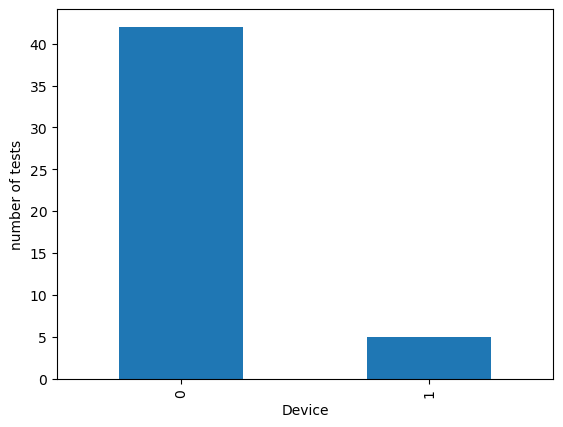

In [46]:
final.Device.value_counts().sort_index().plot.bar()
plt.xlabel("Device")
plt.ylabel("number of tests")

<AxesSubplot:>

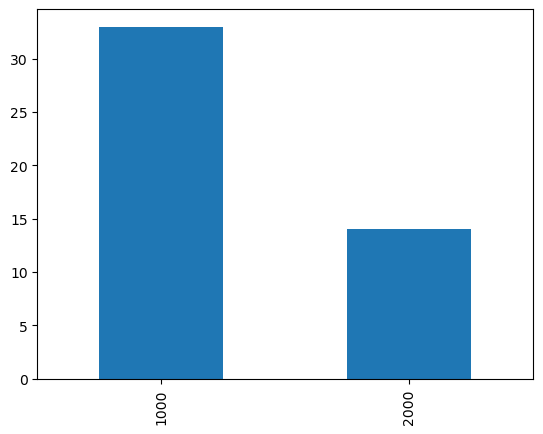

In [28]:
final['CPUFrequency (MHz)'].value_counts().sort_index().plot.bar()

Text(0, 0.5, 'number of tests')

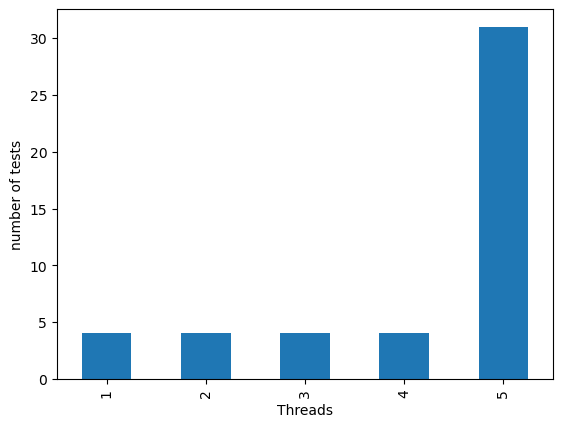

In [48]:
final.Threads.value_counts().sort_index().plot.bar()
plt.xlabel("Threads")
plt.ylabel("number of tests")

<AxesSubplot:>

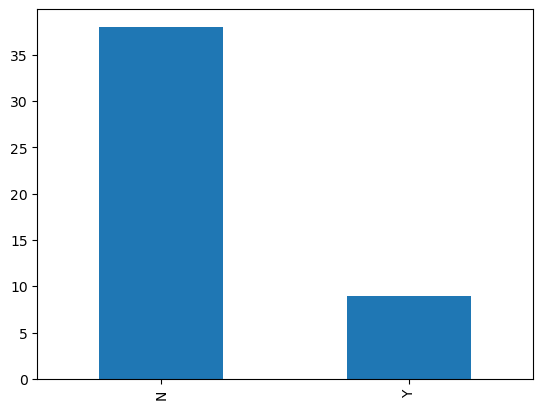

In [43]:
final.Optimised.value_counts().sort_index().plot.bar()

Text(0, 0.5, 'number of tests')

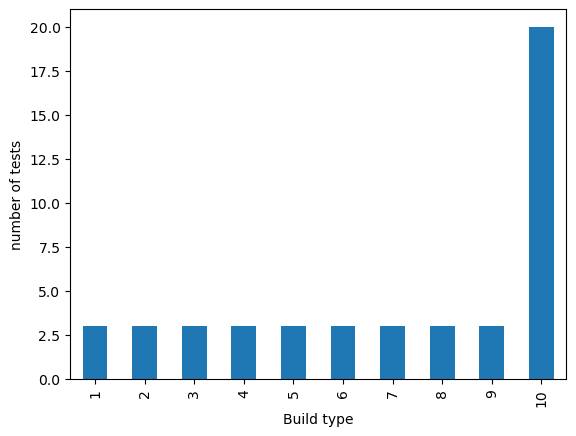

In [49]:
final.Build.value_counts().sort_index().plot.bar()
plt.xlabel("Build type")
plt.ylabel("number of tests")

<AxesSubplot:>

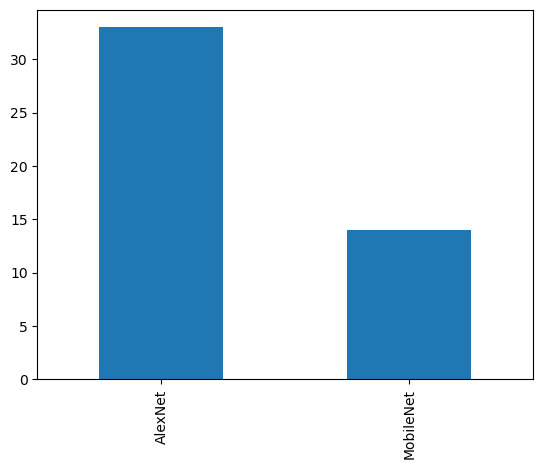

In [31]:
final.MLNetwork.value_counts().sort_index().plot.bar()

## Multivariate analysis

<AxesSubplot:xlabel='CPUFrequency (MHz)', ylabel='Time (ms)'>

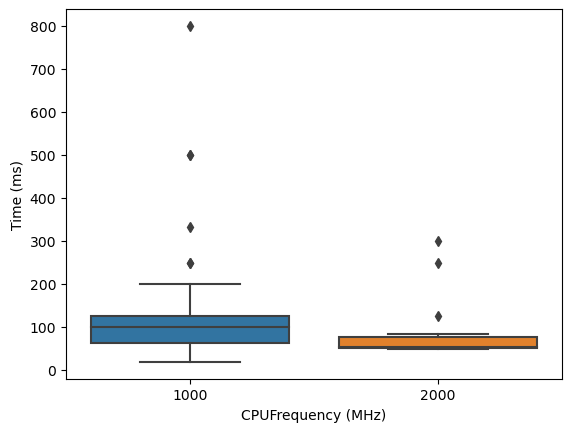

In [32]:
sns.boxplot(x='CPUFrequency (MHz)',y='Time (ms)',data=final)

<AxesSubplot:xlabel='CPUFrequency (MHz)', ylabel='PeakMemory (MB)'>

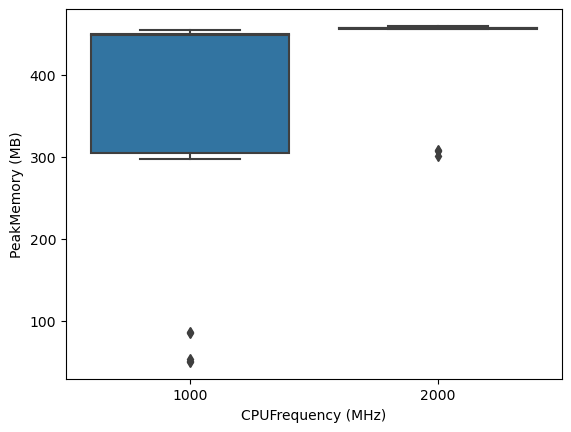

In [33]:
sns.boxplot(x='CPUFrequency (MHz)',y='PeakMemory (MB)',data=final)

<AxesSubplot:xlabel='Threads', ylabel='PeakMemory (MB)'>

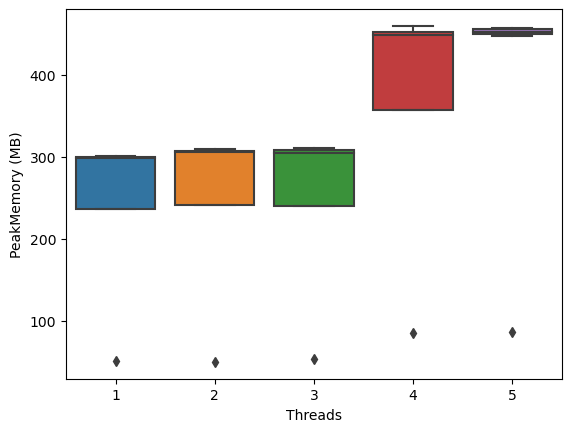

In [34]:
sns.boxplot(x='Threads',y='PeakMemory (MB)',data=final)

<AxesSubplot:xlabel='Threads', ylabel='Time (ms)'>

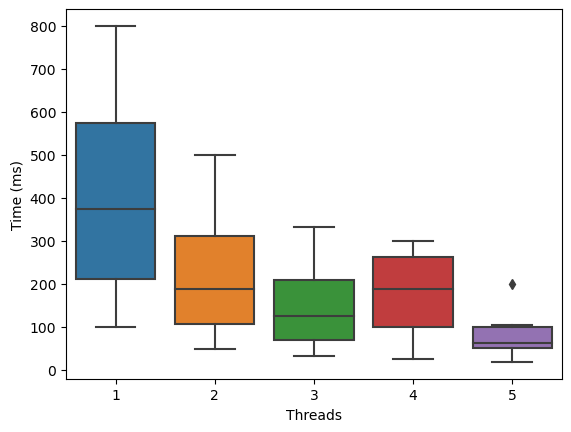

In [35]:
sns.boxplot(x='Threads',y='Time (ms)',data=final)

<AxesSubplot:xlabel='MLNetwork', ylabel='Time (ms)'>

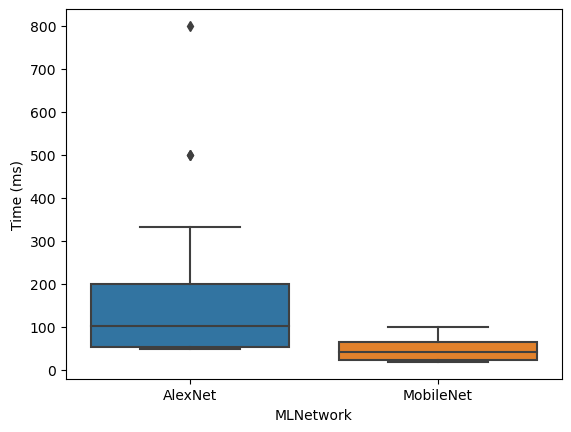

In [36]:
sns.boxplot(x='MLNetwork',y='Time (ms)',data=final)

<AxesSubplot:xlabel='MLNetwork', ylabel='PeakMemory (MB)'>

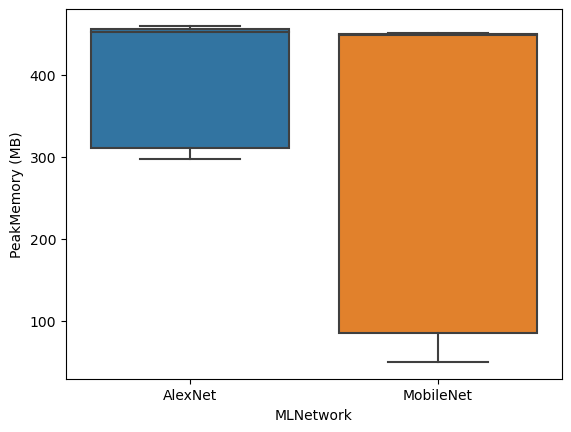

In [37]:
sns.boxplot(x='MLNetwork',y='PeakMemory (MB)',data=final)

<AxesSubplot:xlabel='MLNetwork', ylabel='PeakMemory (MB)'>

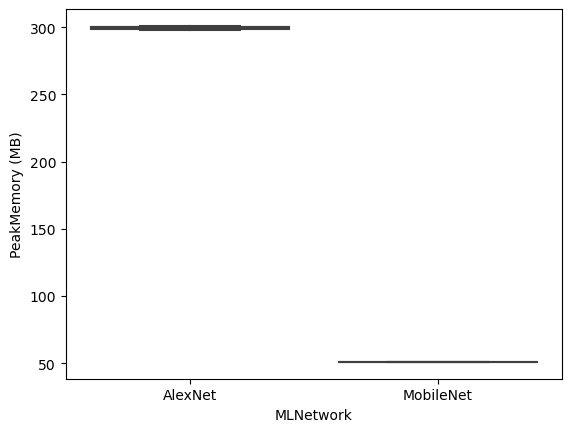

In [38]:
sns.boxplot(x='MLNetwork',y='PeakMemory (MB)',data=final[final['Threads']==1])

<AxesSubplot:xlabel='Build', ylabel='PeakMemory (MB)'>

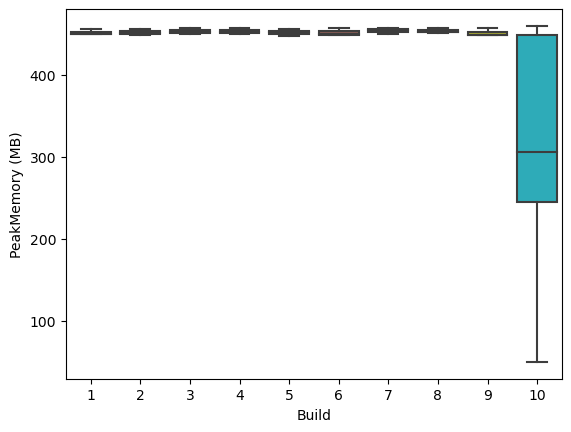

In [39]:
sns.boxplot(x='Build',y='PeakMemory (MB)',data=final)

<AxesSubplot:xlabel='Build', ylabel='Time (ms)'>

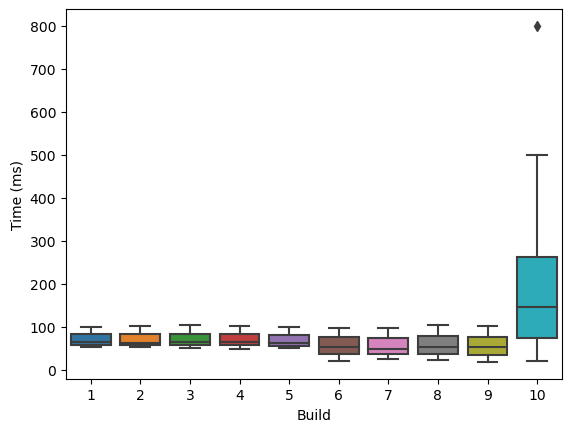

In [40]:
sns.boxplot(x='Build',y='Time (ms)',data=final)

<AxesSubplot:xlabel='PeakMemory (MB)', ylabel='Time (ms)'>

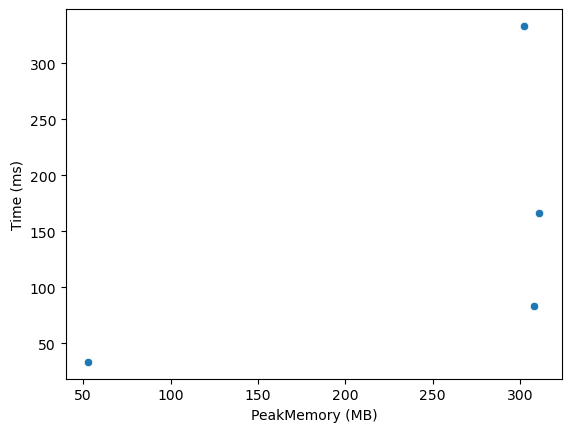

In [123]:
sns.scatterplot(x='PeakMemory (MB)',y='Time (ms)',data=final[final['Threads']==3])

<AxesSubplot:xlabel='PeakMemory (MB)', ylabel='Time (ms)'>

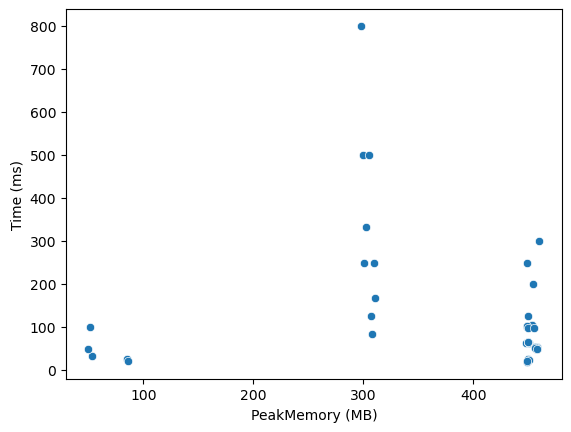

In [116]:
sns.scatterplot(x='PeakMemory (MB)',y='Time (ms)',data=final)

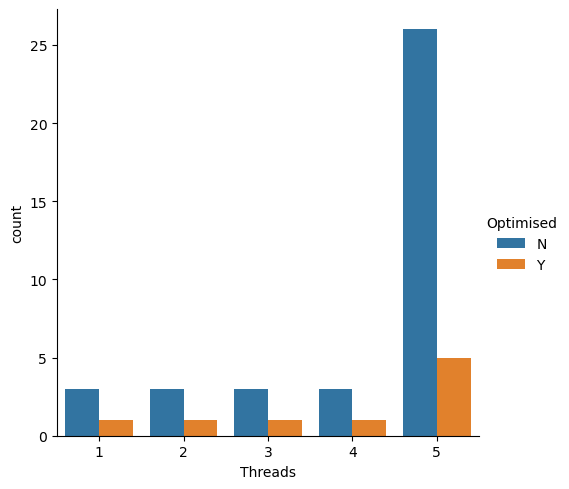

In [90]:
sns.catplot(x='Threads',hue='Optimised',data=final,kind="count")

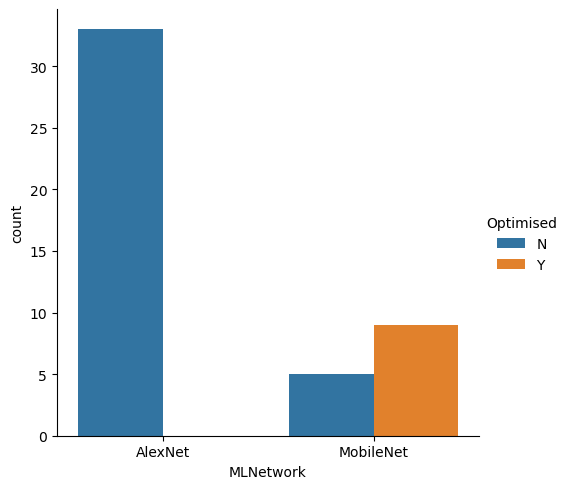

In [91]:
sns.catplot(x='MLNetwork',hue='Optimised',data=final,kind="count")

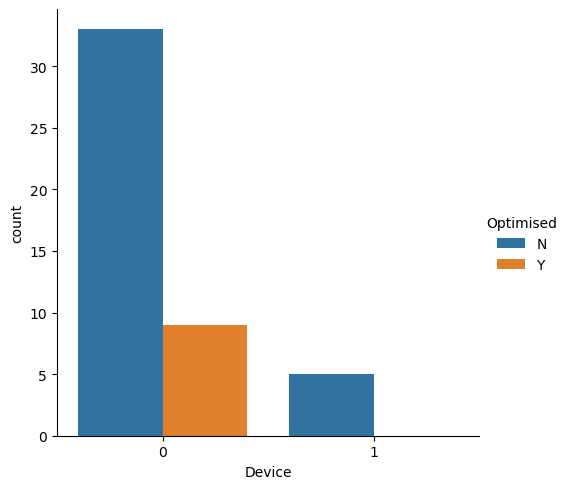

In [95]:
sns.catplot(x='Device',hue='Optimised',data=final,kind="count")

<AxesSubplot:xlabel='Device', ylabel='PeakMemory (MB)'>

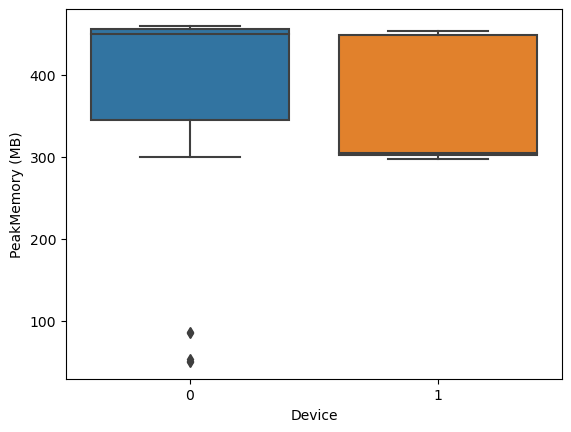

In [98]:
sns.boxplot(x='Device',y='PeakMemory (MB)',data=final)

<AxesSubplot:xlabel='Device', ylabel='Time (ms)'>

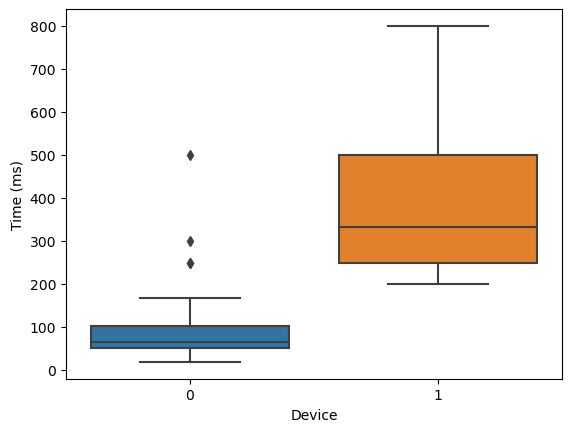

In [99]:
sns.boxplot(x='Device',y='Time (ms)',data=final)

<AxesSubplot:xlabel='Optimised', ylabel='Time (ms)'>

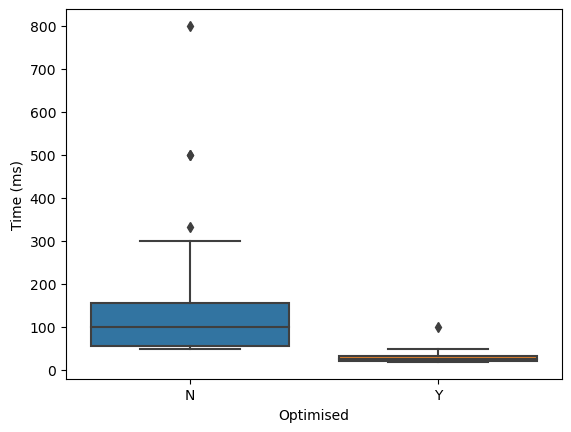

In [41]:
sns.boxplot(x='Optimised',y='Time (ms)',data=final)

<AxesSubplot:xlabel='Optimised', ylabel='PeakMemory (MB)'>

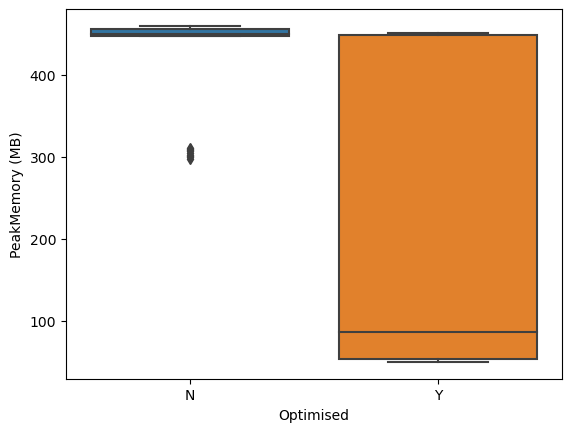

In [42]:
sns.boxplot(x='Optimised',y='PeakMemory (MB)',data=final)

In [97]:
final

,TestId,Device,CPUFrequency (MHz),Threads,MLNetwork,Build,Optimised,Time (ms),PeakMemory (MB)
0,17,0,1000,5,AlexNet,9,N,102.000000,449
1,16,0,1000,5,AlexNet,8,N,104.000000,453
2,39,1,1000,3,AlexNet,10,N,333.333333,302
3,31,0,1000,5,AlexNet,10,N,100.000000,449
4,30,0,1000,4,AlexNet,10,N,125.000000,450
5,25,0,2000,5,AlexNet,8,N,53.000000,458
6,45,0,1000,4,MobileNet,10,Y,25.000000,85
7,34,0,2000,3,AlexNet,10,N,83.333333,308
8,6,0,1000,5,MobileNet,7,Y,25.000000,450
9,27,0,1000,1,AlexNet,10,N,500.000000,300
